Title: Spherical Power-Law simuleted data
    
Date: 08/03/2020

Obj: Simulate an source galaxy and deflect it using an Spherical Power-Law (SPL) mass model.

In [2]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
print(al.__version__)

1.1.4


In [28]:
#Defing the grid
grid = al.Grid.uniform(shape_2d=(150, 150), pixel_scales=0.1, sub_size=1)
psf = al.Kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)

In [29]:
#Defing the mass model
SPL_profile = al.mp.SphericalPowerLaw(centre=(0.0, 0.0), 
                                       slope=2.73, einstein_radius=2.3)
lens_galaxy = al.Galaxy(
    redshift=0.035,
    mass=SPL_profile,
)
SPL_profile.einstein_radius_in_units()

2.300019157877374

In [30]:
#Defining the lens model

light_profile_1 = al.lp.SphericalSersic(
    centre=(1.0, -1.0), intensity=9.0, effective_radius=2.0, sersic_index=2.0
)

light_profile_2 = al.lp.EllipticalSersic(
        centre=(-1.5, 2),
        elliptical_comps=(0.3, 0.111111),
        intensity=6.0,
        effective_radius=3.0,
        sersic_index=2.5,
    )


source_galaxy = al.Galaxy(
    redshift=2.1,
    light_1=light_profile_1,
    light_2=light_profile_2,
)

print(source_galaxy)

Redshift: 2.1
Light Profiles:
SphericalSersic
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 9.0
effective_radius: 2.0
sersic_index: 2.0
EllipticalSersic
centre: (-1.5, 2.0)
elliptical_comps: (0.3, 0.111111)
axis_ratio: 0.5152490035093175
phi: 34.8384409156042
intensity: 6.0
effective_radius: 3.0
sersic_index: 2.5


In [31]:
#Ray tracing the source galaxy
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

In [32]:
mask = al.Mask.circular(
    shape_2d=grid.shape_2d, pixel_scales=grid.pixel_scales, sub_size=1,radius=3 ,centre=(0, 0)
)

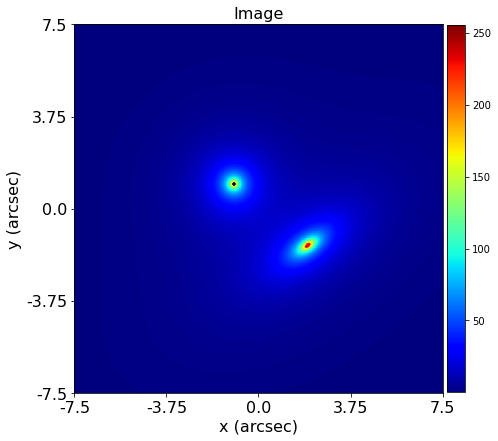

In [33]:
#Save image of source galaxy and plot it
plotter = aplt.Plotter(output=aplt.Output(path='/home/carlos/autolens_workspace/howtolens/Testes with MGE/Spherical Power-Law/Image Output/',
                                          filename='Source Galaxy',
                                           format='png'),
                       labels=aplt.Labels(title='Source Galaxy'),             
                      )

aplt.Galaxy.image(galaxy=source_galaxy, grid=grid, 
                  plotter=plotter)
aplt.Galaxy.image(galaxy=source_galaxy, grid=grid)

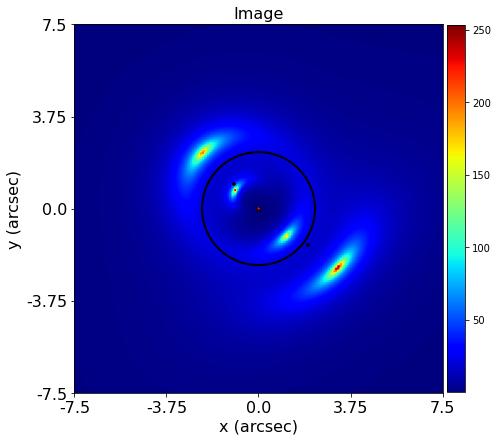

In [34]:
#Save image of arcs and plot it
plotter = aplt.Plotter(output=aplt.Output(path='/home/carlos/autolens_workspace/howtolens/Testes with MGE/Spherical Power-Law/Image Output/',
                                          filename='Arcs',
                                           format='png'),
                       labels=aplt.Labels(title='Arcs'),             
                      )
aplt.Tracer.image(tracer=tracer, grid=grid, plotter=plotter)
aplt.Tracer.image(tracer=tracer, grid=grid)

In [35]:
#Just some infos about shape of the image after convolution with PSF
normal_image = tracer.image_from_grid(grid=grid)
padded_image = tracer.padded_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_2d
)
print(normal_image.shape)
print(padded_image.shape)

(22500,)
(25600,)


In [36]:
#Simulating the arcs image: Add Noise and PSF
simulator = al.SimulatorImaging(
    exposure_time_map=al.Array.full(fill_value=300.0, shape_2d=grid.shape_2d),
    psf=psf,
    background_sky_map=al.Array.full(fill_value=0.1, shape_2d=grid.shape_2d),
    add_noise=True,
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

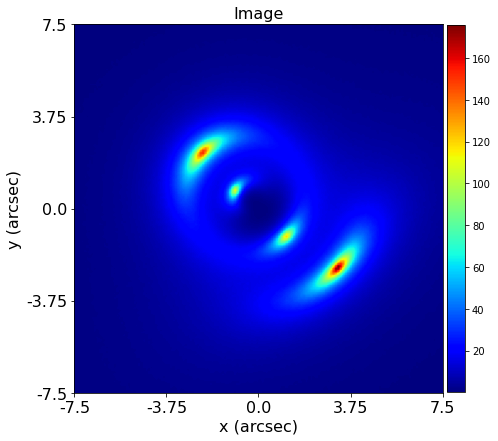

In [37]:
#Plot simulated image and save it
plotter = aplt.Plotter(output=aplt.Output(path='/home/carlos/autolens_workspace/howtolens/Testes with MGE/Spherical Power-Law/Image Output/',
                                          filename='Simulated Arcs',
                                           format='png'),
                       labels=aplt.Labels(title='Arcs with Noise and PSF'),             
                      )
aplt.Imaging.image(imaging=imaging, plotter=plotter)
aplt.Imaging.image(imaging=imaging)

In [38]:
from pyprojroot import here

workspace_path = str(here())
dataset_path = f"{workspace_path}/howtolens/Testes with MGE/Spherical Power-Law/Data"
print("Dataset Path: ", dataset_path)

Dataset Path:  /home/carlos/autolens_workspace/howtolens/Testes with MGE/Spherical Power-Law/Data


In [40]:
imaging.output_to_fits(
    image_path=f"{dataset_path}/ImageSPL.fits",
    noise_map_path=f"{dataset_path}/NoiseSPL.fits",
    psf_path=f"{dataset_path}/PsfSPL.fits",
    overwrite=True,
)